In [1]:
!pip install tensorflow

!pip install opencv-python

!pip install opencv-contrib-python

import tensorflow as tf

import numpy as np

from tensorflow import keras

import os

import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_file_path = '/content/drive/MyDrive/dataset/forestfire.zip'

extraction_folder = '/content/data/'

import zipfile

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:

       zip_ref.extractall(extraction_folder)

In [4]:
train  = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/data/forest_fire/Training and Validation/",
         target_size = (150,150),
        batch_size = 32,
        class_mode = 'binary'
                        )

test_dataset = test.flow_from_directory("/content/data/forest_fire/Testing/",
                   target_size = (150,150),
                   batch_size = 32,
                   class_mode = 'binary'
                                                )

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [6]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))

model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
r = model.fit(train_dataset , epochs = 50, validation_data = test_dataset)

Epoch 1/50
58/58 [==============================] - 18s 52ms/step - loss: 0.2706 - accuracy: 0.8930 - val_loss: 0.2656 - val_accuracy: 0.9265
Epoch 2/50
58/58 [==============================] - 2s 42ms/step - loss: 0.1556 - accuracy: 0.9509 - val_loss: 0.3771 - val_accuracy: 0.8529
Epoch 3/50
58/58 [==============================] - 4s 61ms/step - loss: 0.1227 - accuracy: 0.9640 - val_loss: 0.3505 - val_accuracy: 0.8824
Epoch 4/50
58/58 [==============================] - 3s 48ms/step - loss: 0.1245 - accuracy: 0.9618 - val_loss: 0.5872 - val_accuracy: 0.8235
Epoch 5/50
58/58 [==============================] - 3s 43ms/step - loss: 0.0966 - accuracy: 0.9678 - val_loss: 0.1697 - val_accuracy: 0.9265
Epoch 6/50
58/58 [==============================] - 3s 57ms/step - loss: 0.1061 - accuracy: 0.9656 - val_loss: 0.1459 - val_accuracy: 0.9559
Epoch 7/50
58/58 [==============================] - 3s 44ms/step - loss: 0.0794 - accuracy: 0.9771 - val_loss: 0.2650 - val_accuracy: 0.8824
Epoch 8/50
5

In [9]:
model.save("forest.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
predictions = model.predict(test_dataset)

predictions= np.round(predictions)

3/3 [==============================] - 0s 24ms/step


In [39]:
def predictImage(filename) :
    img1 = image.load_img(filename,target_size = (150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire", fontsize = 30)
    elif val == 0:
        plt.xlabel("Fire", fontsize = 30)

1/1 [==============================] - 0s 32ms/step
[[0.]]


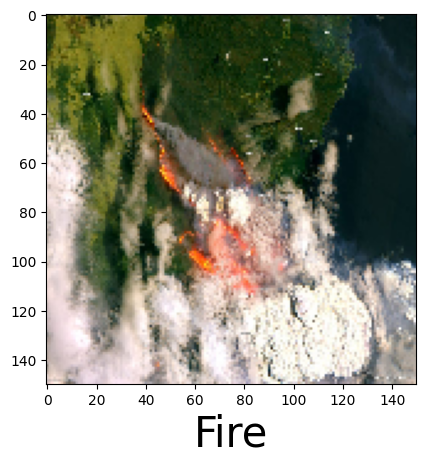

In [13]:
predictImage('/content/drive/MyDrive/dataset/4.jpg')

In [6]:
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model


In [7]:
#load the saved model
model = load_model(r'forest.h5')
#define video
video = cv2.VideoCapture(0)
#define the featues
name = ['forest', 'with fire']

In [49]:
while True:
    success, frame = video.read()
        cv2.imwrite("image.jpg", frame)
        img = image.load_img("image.jpg", target_size=(150,150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        pred = model.predict_classes(x)
        p = pred[0]
        print(pred)
        cv2.putText(frame, "Predicted class = " + str(name[p]), (100, 100),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

        # Display the frame with the text
        cv2.imshow("Frame", frame)

    # Exit if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture object and close any open windows
video.release()
cv2.destroyAllWindows()